# AI-LAB LESSON 3: Constraint Optimization 

In the third session, we will work on the Constraint Optimization Problems (COPs). A real-life problem frequently involves both hard and soft constraints, when we formalize problems that have both types of constraints we get a constraint network augmented with a global cost function over all the variables. COPs find a complete assignment for all the variables, satisfying the hard constraints and optimizing the cost function.

In [1]:
from bucket_elimination import BucketElimination
from bucket import Bucket

The algorithm you will be asked to implement make use of two class **Bucket** and **BucketElimination** and require a basic knowledge of the python data strucutre **Dictionary**.

### Python Dictionaries
A dictionary is a basic data structure implemented in python (in this lesson we use only the basic feature of this structure). 
Following some **hints:**

In [2]:
dic = { "key_0":5, "key_1":8 }
print( "Dictionary:", dic )

dic["key_0"] = 0
dic["key_1"] = 1
dic["key_2"] = 2
print( "Dictionary:", dic )

print( "\nIterate over keys:" )
for key in dic.keys(): print( "\t", key, "\t", dic[key] )

print( "\nIterate over values:" )
for val in dic.values(): print( "\t", val )

Dictionary: {'key_0': 5, 'key_1': 8}
Dictionary: {'key_0': 0, 'key_1': 1, 'key_2': 2}

Iterate over keys:
	 key_0 	 0
	 key_1 	 1
	 key_2 	 2

Iterate over values:
	 0
	 1
	 2


#### Python Unpacking
Python implements the operator **"*"** for the unpacking of a list of variables. This operator can be useful to pass an array of parameters to a function (from a python list), avoiding the explicit extraction of each parameter from the list. This operator could also be useful when the number of parameters is unknown (or parametric). Following some **hints:**

In [3]:
def custom_function_1( var_1, var_2, var_3 ):
    custom_sum = var_1 + var_2 + var_3
    return custom_sum

def custom_function_2( var_1, var_2, var_3, var_4 ):
    custom_sum = var_1 + var_2 + var_3 + var_4
    return custom_sum

variable_list = [[1, 1, 1], [3, 4, 5, 7]]
print( "Explicit extraction (f1):", custom_function_1(variable_list[0][0], variable_list[0][1], variable_list[0][2]) )

print( "Python unpacking (f1):", custom_function_1(*variable_list[0]) )
print( "Python unpacking (f2):", custom_function_2(*variable_list[1]) )

Explicit extraction (f1): 3
Python unpacking (f1): 3
Python unpacking (f2): 19


### Bucket Class

The class **Bucket** implements the data structure necessary for the bucket elimination and accepts the following arguments:
* *variable (str)* - a string that represent the variable of the bucket (literals)
* *soft_cnst (list)* -  the soft contraints, a list of lists, each list is built with the function name for the first element, followed by the intereseted variables.
* *ineq_cnst (list)* - the hard contraints (only inequality constraints), a list of lists, each list represent the variable interested in the inequality contraints

The class **Bucket** also implements the static method *plot_table (table)*, which prints the given table in a human-readable form. 
Example in the code snippet of the bucket elimination class below.

In [4]:
bucket_a = Bucket( variable='a', soft_cnst=[], ineq_cnst=[['a', 'b']] )
bucket_b = Bucket( variable='b', soft_cnst=[], ineq_cnst=[] )

print( bucket_a )
print( bucket_b )

Bucket of Variable: (a). 
	Number of soft constraints: 0                     
	Number of hard constraints: 1
Bucket of Variable: (b). 
	Number of soft constraints: 0                     
	Number of hard constraints: 0


### Bucket Elimination Class
The class **BucketElimination** implements the basic methods for the bucket elimination in a tabular form and accepts the following argument:
* *domain (str)* - the domain of all the variables for the problem, a dictionary with the variable name as key and a list of strings for the correspondin discrete domain.

The following methods are also pre-implemented:
* *add( bucket )* - method that add an object of the class bucket to the problem. 
* *bucket_processing()* - process all the buckets in the given order (following the add chain)
* *value_propagation()* - propagate the value based on the bucket elimination procedure to obtain the global maximum of the given problem and the corresponding assignment for the variables.
* *plot_assignment_as_graph( assignment, soft_eval )* - plot the colored graph following the assignment for the variables.
* *get_tables()* - get method that returns the list of the generated tables

The variable assignment, returned by the method *value_propagation()*, is a python dictionary where the **key** is name of the variable and the **value** is the assigned value from the given domain.

Print tables BEFORE the bucket processing:

Print tables AFTER the bucket processing:

 a   | b   | SUM |
-----|-----|-----|
 R   | B   |   0 |
 R   | Y   |   0 |
 G   | R   |   0 |
 G   | B   |   0 |
 G   | Y   |   0 |
 B   | R   |   0 |
 B   | Y   |   0 |

 b   | h_0 | SUM |
-----|-----|-----|
 R   |   0 |   0 |
 B   |   0 |   0 |
 Y   |   0 |   0 |

Variable Assignment: {'b': 'R', 'a': 'G'}

Global Maximum: 0

Plot the assignment in  a graphical form:



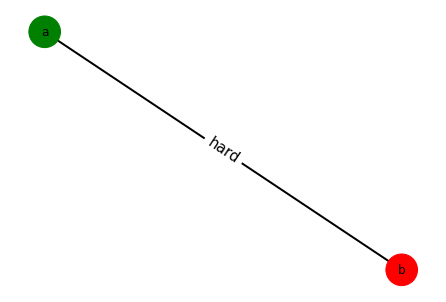

In [5]:
domains = { 'a':['R', 'G', 'B'], 'b':['R', 'B', 'Y'] }

bucket_elimination = BucketElimination( domains )
bucket_elimination.add( bucket_a )
bucket_elimination.add( bucket_b )

print( "Print tables BEFORE the bucket processing:" )
for table in bucket_elimination.get_tables(): 
    print()
    Bucket.plot_table( table )

bucket_elimination.bucket_processing()

print( "\nPrint tables AFTER the bucket processing:" )
for table in bucket_elimination.get_tables(): 
    print()
    Bucket.plot_table( table )
    
assignment, global_maximum = bucket_elimination.value_propagation()
print( "\nVariable Assignment:", assignment )
print( "\nGlobal Maximum:", global_maximum )
print( "\nPlot the assignment in  a graphical form:\n" )
bucket_elimination.plot_assignment_as_graph( assignment, soft_eval=[] )

## Assignment: Bucket Elimination

Your assignment is to implement (or complete) all the necessary functions for the bucket elimination algorithm. In particular you must implement the following functions: 
* **constraint_partitioning( bucket_elimination, variable_order, soft_constraints, hard_constraints )** - in this function you have to implement the logic behind the bucket elimination constraints partitioning, given all the soft constraints and the hard constraints, this function generates all the bucket (in the given order following the algorithm) and add all the bucket to the given bucket elimination class.
* **main_bucket_elimination( problem_name, problem_definition )** - in this function you have to implement the logic behind the bucket elimination process to correctly compute the final_tables, assignment and global maximum (here you should exploit the Bucket and the BucketElimination class and methods).
* **get_max_table_size( final_tables )** - this function must return the maximum number of elements that appear in one of the tables generated during the process, i.e. the number of elements (rows*columns) that appear in one of the tables in the entire process.
* **evaluate_soft_constraints( assignment, soft_constraints )** - this function must returns a list with the results of the evaluation of the soft constraints given the variables assignment.

In [6]:
def constraint_partitioning( bucket_elimination, variable_order, soft_constraints, hard_constraints ):
    
    """
    Generate the bucket with the corresponding constraints in the correct order (inverse of the given), and add all the buckets to the bucket_elimination object that represent the problem.

    Parameters
    ----------
        bucket_elimination : BucketElimination 
            the object of the class BucketElimination that represent the current problem (empty).
        variable_order : list
            the variables that appear in the problem in the given order.
        soft_constraints : list
            the soft contraints, a list of lists, each list is built with the function name for the first element, followed by the intereseted variables.
        hard_constraints : list
            the hard contraints (only inequality constraints), a list of lists, each list represent the variable interested in the inequality contraints.

    Returns:
    --------
        bucket_elimination : BucketElimination
            the object of the class BucketElimination that represents the current problem (with the bucket filled).
    """
    
    set_hard_constraints = hard_constraints.copy()
    set_soft_constraints = soft_constraints.copy()
    
    # Processa le variabili al contrario
    for var in reversed(variable_order):
        
        var_soft_constraints = []
        var_hard_constraints = []
        
        # Alloca le vincoli soft della variabile del bucket
        for constraint in set_soft_constraints:
            if var in constraint:
                var_soft_constraints.append(constraint)
                
        # Alloca i vincoli hard della variabiledel bucket
        for constraint in set_hard_constraints:
            if var in constraint:
                var_hard_constraints.append(constraint)
                
        # Rimuove vincoli già allocati
        set_soft_constraints = [c for c in set_soft_constraints if c not in var_soft_constraints]
        set_hard_constraints = [c for c in set_hard_constraints if c not in var_hard_constraints]
    
        # Aggiunge bucket generato per la variabile
        bucket = Bucket(variable = var, soft_cnst = var_soft_constraints, ineq_cnst = var_hard_constraints)
        bucket_elimination.add(bucket)
        
    return bucket_elimination

In [7]:
def main_bucket_elimination( problem_name, problem_definition ):
    
    """
    Main script of the bucket elimination, given the problem definition compute the global_maximum, 
    the correct assignment and the memory cost of the process.

    Parameters
    ----------
        problem_name : str 
            the name of the problem, for visualization purpose.
        problem_definition : list
            complete definition of the problem, a list that contain (in order): 
            problem_domains, variable_order, problem_soft_constraints and problem_hard_constraints.
    """
    
    # Extract the problem constant from the parameter "problem_definition"
    problem_domains, problem_order, problem_soft_constraints, problem_hard_constraints = problem_definition
    assignment, global_maximum, max_table_size = None, None, None
    
    # Processa buckets
    bucket_elimination = BucketElimination(problem_domains)
    constraint_partitioning(bucket_elimination, problem_order, problem_soft_constraints, problem_hard_constraints)
    bucket_elimination.bucket_processing()
    
    # Propaga valori e calcola vincoli soft
    assignment, global_maximum = bucket_elimination.value_propagation()
    evaluations = evaluate_soft_constraints(assignment, problem_soft_constraints)
    max_table_size = get_max_table_size(bucket_elimination.get_tables())
    
    # Plot all the computed results
    print( f"\nBucket Elimination for the: {problem_name}:" )
    print( f"\tVariable Assignment: {assignment}" )
    print( f"\tGlobal Maximum Found: {global_maximum}" )
    print( f"\tMaximum Table Size (with the order {problem_order}): {max_table_size}" )
    print( "\tGraphical Visualization:" )
    bucket_elimination.plot_assignment_as_graph( assignment, evaluations )

In [8]:
def get_max_table_size( final_tables ):
    
    """
    Compute the maximum number of elements that appear in one of the table generated inside the main process.

    Parameters
    ----------
        final_tables : list 
            list of the tables generated inside the loop for each bucket.

    Returns:
    --------
        max_table_size : int
            the number of elements inside the largest table (i.e., number of row multiplied by the number of columns).
    """
    
    max_table_size = 0
    for table in final_tables:
            table_size = len(table) * len(table[0])
            max_table_size = max(table_size, max_table_size)
            
    return max_table_size

In [9]:
def evaluate_soft_constraints( assignment, soft_constraints ): 
    
    """
    Compute the value of the soft constraints, evaluating them on the given the variables assignment.

    Parameters
    ----------
        assignment : dict 
            the assignment for each variable to obtain the maximum (the key is the literal and the value is the assigned value).
        soft_constraints : list
            the soft contraints, a list of lists, each list is built with the function name for the first element, followed by the intereseted variables.

    Returns:
    --------
        evaluations : list
            a list with the results of the evaluation of the soft constraints given the variables assignment.
    """
    
    evaluations = []
    for constaint in soft_constraints:
        
        # Skippa primo elemento (function)
        values = []
        for var in constaint[1:]:
            values.append(assignment[var])
        
        result = constaint[0](*values)
        evaluations.append(result)
        
    
    return evaluations

### Problem Definitions:

The following initializations provide the structure for the 3 problems of this lesson:

In [10]:
def F_1( x_i, x_j ):
    if x_i != x_j: return 0
    elif x_i == 'R' and x_j == 'R': return -1
    elif x_i == 'B' and x_j == 'B': return -2 
    else: raise ValueError("Invalid Value for F")
    
def F_2( x_i, x_j ):
    if x_i != x_j: return 0
    elif x_i == 'R' and x_j == 'R': return 2
    elif x_i == 'B' and x_j == 'B': return 1 
    else: raise ValueError("Invalid Value for F")

PROBLEM_GC = [
    { 'X1':['R', 'B', 'Y'], 'X2':['R', 'B', 'Y'], 'X3':['R', 'B', 'Y'], 'X4':['R', 'B', 'Y'], 'X5':['R', 'B', 'Y'] }, # PROBLEM DOMAINS
    ['X5', 'X4', 'X3', 'X2', 'X1'], # PROBLEM ORDER
    [], # PROBLEM SOFT CONSTRAINTS
    [['X1', 'X2'], ['X2', 'X3'], ['X3', 'X4'], ['X2', 'X4'], ['X1', 'X4'], ['X2', 'X5'], ['X3', 'X5'], ['X1', 'X5']] # PROBLEM HARD CONSTRAINTS
]    

PROBLEM_2 = [
    { 'X1':['R', 'B'], 'X2':['R', 'B'], 'X3':['R', 'B'], 'X4':['R', 'B'] }, # PROBLEM DOMAINS
    ['X1', 'X2', 'X3', 'X4'], # PROBLEM ORDER
    [[F_2, 'X1', 'X2'], [F_2, 'X2', 'X3'], [F_2, 'X2', 'X4']], # PROBLEM SOFT CONSTRAINTS
    [['X1', 'X3'], ['X3', 'X4']] # PROBLEM HARD CONSTRAINTS
]    

PROBLEM_1 = [
    { 'X1':['R', 'B'], 'X2':['R', 'B'], 'X3':['R', 'B'], 'X4':['R', 'B'] }, # PROBLEM DOMAINS
    ['X4', 'X3', 'X2', 'X1'], # PROBLEM ORDER
    [[F_1, 'X1', 'X2'], [F_1, 'X1', 'X4'], [F_1, 'X2', 'X4'], [F_1, 'X3', 'X4']], # PROBLEM SOFT CONSTRAINTS
    [] # PROBLEM HARD CONSTRAINTS
]

## Exercise: Graph Coloring

The following code calls your *get_bucket_elimination_tables* and *get_bucket_elimination_assignment* to the graph coloring problem:


Bucket Elimination for the: Problem Graph Coloring:
	Variable Assignment: {'X5': 'R', 'X4': 'R', 'X3': 'B', 'X2': 'Y', 'X1': 'B'}
	Global Maximum Found: 0
	Maximum Table Size (with the order ['X5', 'X4', 'X3', 'X2', 'X1']): 120
	Graphical Visualization:


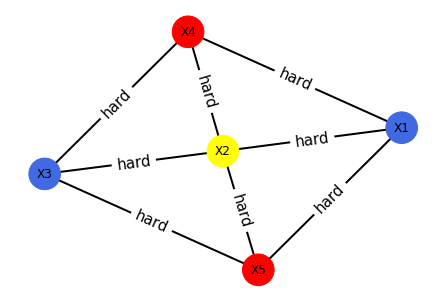

In [11]:
main_bucket_elimination( "Problem Graph Coloring", PROBLEM_GC )

Correct results can be found [here](lesson_3_results.txt) and with the resulting graph below:

<img src="images/graph_coloring.png" width="250">

### Exercise: Partial Tests 15/05/2013

The following code calls your *get_bucket_elimination_tables* and *get_bucket_elimination_assignment* to compute and solve a complete bucket elimination problem and prints the results (tabular and graphical form). The problems are extracted from the partial test of *15/05/2013* and *04/05/2016*


Bucket Elimination for the: Partial Test 15/05/2013:
	Variable Assignment: {'X4': 'R', 'X3': 'B', 'X2': 'R', 'X1': 'B'}
	Global Maximum Found: -1
	Maximum Table Size (with the order ['X4', 'X3', 'X2', 'X1']): 48
	Graphical Visualization:


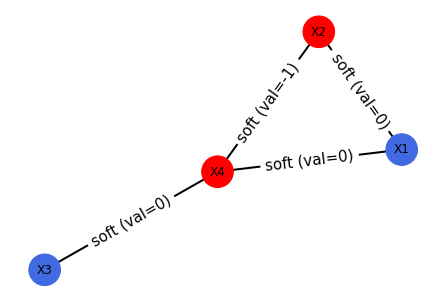

In [12]:
main_bucket_elimination( "Partial Test 15/05/2013", PROBLEM_1 )

Correct results can be found [here](lesson_3_results.txt) and with the resulting graph below:

<img src="images/partial_test_a.png" width="250">

## Exercise: Partial Tests 04/05/2016

The following code calls your *get_bucket_elimination_tables* and *get_bucket_elimination_assignment* to compute and solve a complete bucket elimination problem and prints the results (tabular and graphical form). The problems are extracted from the partial test of *15/05/2013* and *04/05/2016*


Bucket Elimination for the: Partial Test 04/05/2016:
	Variable Assignment: {'X1': 'R', 'X2': 'R', 'X3': 'B', 'X4': 'R'}
	Global Maximum Found: 4
	Maximum Table Size (with the order ['X1', 'X2', 'X3', 'X4']): 24
	Graphical Visualization:


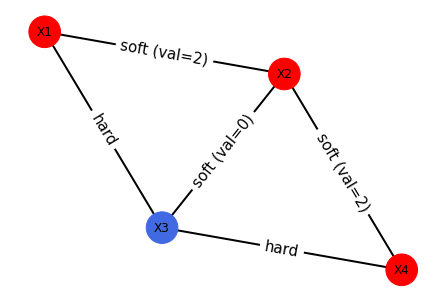

In [25]:
main_bucket_elimination( "Partial Test 04/05/2016", PROBLEM_2 )

Correct results can be found [here](lesson_3_results.txt) and with the resulting graph below:

<img src="images/partial_test_b.png" width="250">

## Analysis: Variables Order

Now that you have correctly implemented the bucket elimination algorithm, what can you say about the solutions they compute? Changing the order of the variables, does the result change? And the memory cost?